# Exercise 1

In [ ]:
import os
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1' # CPU only
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Iris data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Define the path to your zip file
file_path = '/content/drive/MyDrive/HNU_Deep_Learning/iris.zip'

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/HNU_Deep_Learning/datasets')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/HNU_Deep_Learning/datasets/iris.data", header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.shape

(150, 5)

In [ ]:
data.nunique()

0    35
1    23
2    43
3    22
4     3
dtype: int64

In [ ]:
X = np.array(data)

# converting the classes to numbers
classes = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
X[:,4] = [classes[item] for item in X[:,4]]

X = X.astype("float")
print(X[:5,])

[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]]


In [ ]:
np.random.seed(777)

# shuffle the data
ind = np.random.choice(X.shape[0], X.shape[0], replace=False)
X = X[ind]

# build training (80%) and test (20%) data set
X_train = X[int(X.shape[0] * 0.2):, :4]
y_train = X[int(X.shape[0] * 0.2):, 4]
X_test = X[:int(X.shape[0] * 0.2), :4]
y_test = X[:int(X.shape[0] * 0.2), 4]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(120, 4)
(120,)
(30, 4)


In [ ]:
np.random.seed(777)
tf.random.set_seed(777)

### exercise: build a fitting keras model with one hidden layer with five (hidden) neurons,

np.random.seed(777)
tf.random.set_seed(777)

model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(4,)), # input layer with 4 features
                             tf.keras.layers.Dense(5, activation="ReLU"), # hidden layer
                             tf.keras.layers.Dense(3, activation="softmax")]) # output layer

### "compile" the appropriate optimizer and loss function and start the training
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer= tf.keras.optimizers.SGD(learning_rate = 0.01),
              metrics= ['accuracy'])

#fit the model
history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose= False)

In [ ]:
print(model.summary())
model.get_weights()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 25        
                                                                 
 dense_10 (Dense)            (None, 3)                 18        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


[array([[ 0.94907653, -0.77436054,  0.17008376,  0.16392404,  0.18347567],
        [ 1.1889122 , -0.0712623 , -0.6284947 , -0.43720517, -0.3667938 ],
        [-0.80255383,  0.7214004 , -0.5048174 , -0.76682884,  1.0107311 ],
        [-0.56645584,  0.3461218 ,  0.6344011 ,  0.55864334,  1.623861  ]],
       dtype=float32),
 array([ 0.31037894,  0.        ,  0.        ,  0.        , -0.29457268],
       dtype=float32),
 array([[ 1.1141424 ,  0.3000635 , -1.5122231 ],
        [-0.24584335,  0.23739558,  0.15234977],
        [ 0.52479357, -0.30366796,  0.12719369],
        [-0.6167155 ,  0.25202423,  0.81513816],
        [-1.1587802 ,  0.2780939 ,  1.513138  ]], dtype=float32),
 array([ 0.10884292,  0.14607161, -0.25491428], dtype=float32)]

In [ ]:
### exercise: plot the accuracies for the validation and the training data set.
pd.DataFrame(history.history)
### Read the keras documentation about what model.fit() returns (history)

,loss,accuracy,val_loss,val_accuracy
0,3.570910,0.281250,2.537824,0.416667
1,2.939589,0.229167,2.120457,0.458333
2,2.454322,0.312500,1.889366,0.458333
3,2.168020,0.302083,1.765072,0.458333
4,2.004340,0.291667,1.688695,0.458333
...,...,...,...,...
495,0.144718,0.979167,0.134104,1.000000
496,0.144829,0.979167,0.133917,1.000000
497,0.148416,0.979167,0.133960,1.000000
498,0.146455,0.979167,0.134270,1.000000


In [ ]:
# Test loss and accuracy
model.evaluate(X_test, y_test, verbose=False)

[0.12691910564899445, 0.9666666388511658]

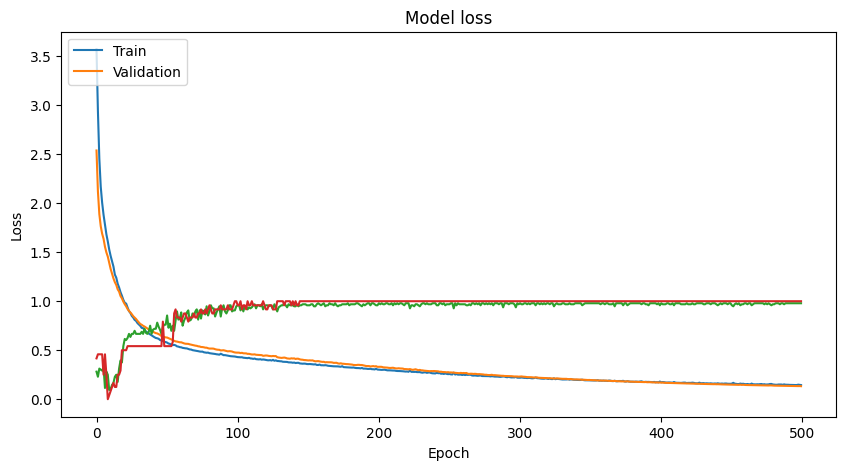

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Assuming 'history' is the history object returned by model.fit()
plot_history(history)

# Breast Cancer Wisconsin data set

In [ ]:
# Define filepath
file_path = '/content/drive/MyDrive/HNU_Deep_Learning/wdbc.zip'


# Unzip file
with zipfile.ZipFile(file_path, 'r') as zip_ref:
  zip_ref.extractall('/content/drive/MyDrive/HNU_Deep_Learning/datasets')

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/HNU_Deep_Learning/datasets/wdbc_training.csv', decimal=",")

data_train

,﻿Malignant,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,ConcavePointsMean,SymmetryMean,...,RadiusWorst,TextureWorst,PerimeterWorst,AreaWorst,SmoothnessWorst,CompactnessWorst,ConcavityWorst,ConcavePointsWorst,SymmetryWorst,FractalDimensionWorst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.25750,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
394,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
395,0,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
396,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820


In [ ]:
X = np.array(data_train)
X_train = X[:,1:]
y_train = X[:,0].astype("int")
print(X_train.shape)
print(y_train.shape)

(398, 30)
(398,)


In [ ]:
data_test = pd.read_csv("/content/drive/MyDrive/HNU_Deep_Learning/datasets/wdbc_test.csv", decimal=",")

X = np.array(data_test)
X_test = X[:,1:]
y_test = X[:,0].astype("int")
print(X_test.shape)
print(y_test.shape)

(171, 30)
(171,)


In [ ]:
np.random.seed(777)
tf.random.set_seed(777)

### exercise: build a fitting keras model with one hidden layer with five (hidden) neurons,
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(30,),
    tf.keras.layers.Dense(5, activation= "sigmoid"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

### "compile" the appropriate optimizer and loss function and start the training
model.compile(loss= "binary_crossentropy",
              optimizer = tf.keras.optimizers.SGD(lr= 0.01),
              metrics = ["accuracy"])
#model = None

history = model.fit(X_train, y_train, epochs=500, validation_split=0.2, verbose=False)

In [ ]:
### exercise: plot the accuracies for the validation and the training data set.
pd.DataFrame(history.history)
### Read the keras documentation about what model.fit() returns (history)


,loss,accuracy,val_loss,val_accuracy
0,0.723485,0.566038,0.529937,0.8
1,0.717059,0.566038,0.535398,0.8
2,0.711584,0.566038,0.540939,0.8
3,0.707042,0.566038,0.546245,0.8
4,0.703280,0.566038,0.551440,0.8
...,...,...,...,...
495,0.684605,0.566038,0.622663,0.8
496,0.684622,0.566038,0.622448,0.8
497,0.684651,0.566038,0.622546,0.8
498,0.684475,0.566038,0.622585,0.8


In [ ]:
# Test loss and accuracy
model.evaluate(X_test, y_test, verbose=False)

[0.6593932509422302, 0.6608186960220337]

## Improving the model
Let us normalize the feature variables and see if we can improve the model

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer


# Define column indices for feature scaling
# Replace [0, 1, 2, ...] with the actual indices of the features you want to scale
feature_indices = [0, 1, 2, ...]  # Example: [0, 1, 2] for the first three features

# Convert X_train and X_test to pandas dataframe
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Define column transformer for training data
ct1 = make_column_transformer((MinMaxScaler(), slice(0, X_train_df.shape[1])), remainder='passthrough')

# Define column transformer for test data
ct2 = make_column_transformer((MinMaxScaler(), slice(0, X_test_df.shape[1])), remainder='passthrough')

# Fit and transform training data
X_train_norm = ct1.fit_transform(X_train)

# Transform test data (only transform, do not fit again)
X_test_norm = ct2.fit_transform(X_test)

In [ ]:
tf.random.set_seed(777)

### exercise: build a fitting keras model with one hidden layer with five (hidden) neurons,
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(30,),
    tf.keras.layers.Dense(5, activation= "ReLU"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

### "compile" the appropriate optimizer and loss function and start the training
model.compile(loss= "binary_crossentropy",
              optimizer = tf.keras.optimizers.SGD(lr= 0.01),
              metrics = ["accuracy"])
#model = None

history = model.fit(X_train_norm, y_train, epochs=500, validation_split=0.2, verbose=False)

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.658504,0.704403,0.671085,0.6250
1,0.653574,0.707547,0.668306,0.6500
2,0.648494,0.713836,0.665712,0.6250
3,0.643508,0.713836,0.662807,0.6125
4,0.638737,0.720126,0.659870,0.5875
...,...,...,...,...
495,0.108170,0.962264,0.155141,0.9625
496,0.108074,0.962264,0.154738,0.9625
497,0.107885,0.959119,0.154621,0.9625
498,0.107750,0.962264,0.155047,0.9625


In [ ]:
X_test_norm.shape, X_train_norm.shape, y_test.shape

((171, 30), (398, 30), (171,))

In [ ]:
# Test loss and accuracy
model.evaluate(X_test_norm, y_test, verbose=False)

[0.152934268116951, 0.9356725215911865]

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Assuming 'history' is the history object returned by model.fit()
plot_history(history)

# London Bike Sharing data set

In [ ]:
# Define filepath
file_path = '/content/drive/MyDrive/HNU_Deep_Learning/london_bike_sharing.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
  zip_ref.extractall('/content/drive/MyDrive/HNU_Deep_Learning/datasets')


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/HNU_Deep_Learning/datasets/london_merged.csv')

### exercise: add hour, weekday, month and year from timestamp and remove timestamp afterwards.
### Read pandas documentation of how to do it, especially here: https://pandas.pydata.org/docs/user_guide/10min.html#setting
### and here: https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components


# Convert "timestamp" column to datetime if it's not already in datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract hour, weekday, month, and year from the "timestamp" column
data['hour'] = data['timestamp'].dt.hour
data['weekday'] = data['timestamp'].dt.weekday  # Monday: 0, Sunday: 6
data['month'] = data['timestamp'].dt.month
data['year'] = data['timestamp'].dt.year

# Drop the original "timestamp" column
data.drop(columns=['timestamp'], inplace=True)

# Now data contains hour, weekday, month, and year columns

# Let us check the first 5 rows of our data
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,weekday,month,year
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,6,1,2015
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,1,2015
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,6,1,2015
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,6,1,2015
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,6,1,2015


In [ ]:
data.shape

(17414, 13)

In [ ]:
X = np.array(data)
ind = X[:,-1] < 2016
X = X[:,:-1] # remove year
X_train = X[ind,1:] # training data is for the year 2015
y_train = X[ind,0]
X_test = X[~ind,1:] # test data is for the years 2016 and 2017
y_test = X[~ind,0]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(8643, 11)
(8643,)
(8771, 11)


In [ ]:
X_train

array([[ 3. ,  2. , 93. , ...,  0. ,  6. ,  1. ],
       [ 3. ,  2.5, 93. , ...,  1. ,  6. ,  1. ],
       [ 2.5,  2.5, 96.5, ...,  2. ,  6. ,  1. ],
       ...,
       [ 8. ,  5. , 73.5, ..., 21. ,  3. , 12. ],
       [ 7. ,  3. , 76. , ..., 22. ,  3. , 12. ],
       [ 7. ,  4.5, 76. , ..., 23. ,  3. , 12. ]])

In [ ]:
np.random.seed(777)
tf.random.set_seed(777)

### exercise: build a fitting keras model with at least two hidden layers,
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(11,),
    tf.keras.layers.Dense(10, activation= "ReLU"),
    tf.keras.layers.Dense(10, activation= "ReLU"),
 #   tf.keras.layers.Dense(5, activation= "ReLU"),
    tf.keras.layers.Dense(1, activation = "linear")
])
### "compile" the appropriate optimizer and loss function and start the training
model.compile(loss= "MAE",
              optimizer = "adam",
              metrics = ["MAE"])
### find out yourself which number of hidden layers and number of hidden neurons are
### best in terms of minimum MAE

model = model

history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=True)

Epoch 1/1000
217/217 [==============================] - 1s 3ms/step - loss: 1129.8550 - MAE: 1129.8550 - val_loss: 750.3206 - val_MAE: 750.3206
Epoch 2/1000
217/217 [==============================] - 0s 2ms/step - loss: 925.3204 - MAE: 925.3204 - val_loss: 635.0671 - val_MAE: 635.0671
Epoch 3/1000
217/217 [==============================] - 0s 2ms/step - loss: 833.9990 - MAE: 833.9990 - val_loss: 654.3592 - val_MAE: 654.3592
Epoch 4/1000
217/217 [==============================] - 1s 2ms/step - loss: 793.4335 - MAE: 793.4335 - val_loss: 646.5612 - val_MAE: 646.5612
Epoch 5/1000
217/217 [==============================] - 0s 2ms/step - loss: 740.8098 - MAE: 740.8098 - val_loss: 624.2536 - val_MAE: 624.2536
Epoch 6/1000
217/217 [==============================] - 0s 2ms/step - loss: 684.9617 - MAE: 684.9617 - val_loss: 630.9397 - val_MAE: 630.9397
Epoch 7/1000
217/217 [==============================] - 0s 2ms/step - loss: 653.2393 - MAE: 653.2393 - val_loss: 602.6205 - val_MAE: 602.6205
Epoc

In [ ]:
### exercise: plot the MAEs for the validation and the training data set.
pd.DataFrame(history.history)
### Read the keras documentation about what model.fit() returns (history)

,loss,MAE,val_loss,val_MAE
0,1129.854980,1129.854980,750.320618,750.320618
1,925.320374,925.320374,635.067139,635.067139
2,833.998962,833.998962,654.359192,654.359192
3,793.433472,793.433472,646.561218,646.561218
4,740.809753,740.809753,624.253601,624.253601
...,...,...,...,...
995,351.061981,351.061981,375.770966,375.770966
996,350.906372,350.906372,377.448883,377.448883
997,351.079193,351.079193,378.045197,378.045197
998,350.119141,350.119141,388.057159,388.057159


In [ ]:
# Test loss and MAE
model.evaluate(X_test, y_test, verbose=False)

[375.1822204589844, 375.1822204589844]

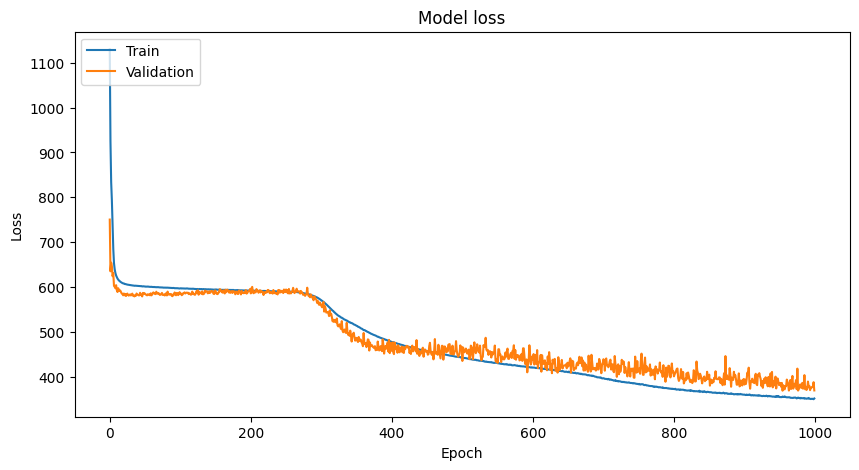

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    # Plot training & validation loss values
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Assuming 'history' is the history object returned by model.fit()
plot_history(history)